In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.exceptions import ConvergenceWarning

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [3]:
boston_data = load_boston()
X = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
y = pd.DataFrame(boston_data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
def eval_metrics(model, X_train, y_train, y_predict_train, X_test, y_test, y_predict, eval_metrics_dict):
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)
    
    mse_train = np.sqrt(mean_squared_error(y_train, y_predict_train))
    mse_test = np.sqrt(mean_squared_error(y_test, y_predict))
    
    eval_metrics_dict['r2_train'].append(r2_train)
    eval_metrics_dict['r2_test'].append(r2_test)
    eval_metrics_dict['mse_train'].append(mse_train)
    eval_metrics_dict['mse_test'].append(mse_test)
    
    return eval_metrics_dict

In [4]:
def plot_eval_metrics(degrees_range, eval_metrics_dict):
    
    plt.subplot(121)
    plt.tight_layout()
    plt.plot(degrees_range, eval_metrics_dict['r2_train'], color='blue')
    plt.plot(degrees_range, eval_metrics_dict['r2_test'], color='red')
    plt.title('R^2')
    
    plt.subplot(122)
    plt.tight_layout()
    plt.plot(degrees_range, eval_metrics_dict['mse_train'], color='blue')
    plt.plot(degrees_range, eval_metrics_dict['mse_test'], color='red')
    plt.title('MSE')

In [5]:
def linear_regression(model, max_degrees):
    
    result = {
        'r2_train': [],
        'r2_test': [],
        'mse_train': [],
        'mse_test': [],
    }
    
    for degree in range(1, max_degrees + 1):
        model_p = make_pipeline(PolynomialFeatures(degree, interaction_only=False), model)
        model_p.fit(X_train, y_train)
        
        y_predict_train = model_p.predict(X_train)
        y_predict = model_p.predict(X_test)
        
        result = eval_metrics(model_p, X_train, y_train, y_predict_train, X_test, y_test, y_predict, result)
        
    return result
        

{'mse_test': [4.452157577466533,
  3.5476965764912753,
  481.9516840193039,
  98.88850181186204,
  118.42550278356178],
 'mse_train': [4.750277178571717,
  3.0601538142921414,
  2.1482254571244103e-07,
  2.9267456380620694e-10,
  2.354766345294745e-10],
 'r2_test': [0.7742601562252496,
  0.8566624082049713,
  -2644.2953595898593,
  -110.36757430213227,
  -158.71938906808342],
 'r2_train': [0.7289191341948231,
  0.8875013078394973,
  0.9999999999999993,
  1.0,
  1.0]}

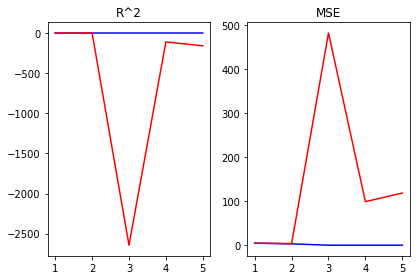

In [6]:
max_degrees = 5
degrees_range = np.arange(1, max_degrees + 1)

# linear regression with regularization
lm = LinearRegression()

eval_metrics_dict = linear_regression(lm, max_degrees)
plot_eval_metrics(degrees_range, eval_metrics_dict)

eval_metrics_dict

{'mse_test': [4.443842497242842,
  2.8215179240950565,
  2.7069709067165486,
  2.573665968942448,
  2.5327205435404037],
 'mse_train': [4.752503821220585,
  3.0508820641282934,
  2.6420712038759606,
  2.381517532944569,
  2.2378890382868617],
 'r2_test': [0.7751025756791277,
  0.9093364348120417,
  0.9165484625393093,
  0.9245652377556692,
  0.9269463849222439],
 'r2_train': [0.7286649420034894,
  0.88818197925868,
  0.9161409387281995,
  0.9318652718399647,
  0.9398358120623623]}

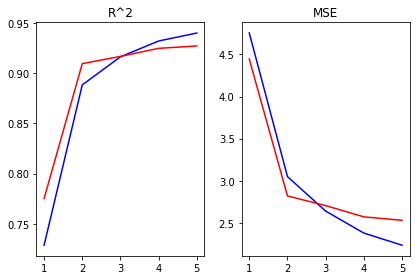

In [8]:
max_degrees = 5
degrees_range = np.arange(1, max_degrees + 1)

# linear regression with Lasso
lm = Lasso(alpha=0.001, max_iter=1000, normalize=True)

eval_metrics_dict = linear_regression(lm, max_degrees)
plot_eval_metrics(degrees_range, eval_metrics_dict)

eval_metrics_dict